# Python and Data Cleaning

In [18]:
import pandas as pd 
import numpy as np

In [24]:
# Loading Dataset
df = pd.read_csv(r"C:\Users\Hp\Downloads\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [22]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
# datatypes, and null values
df.info()
#There are no null values, and all columns are of the expected data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#Checking for duplicate rows or invalid data entries.

df.duplicated().sum()     #No duplicate rows found.
df.describe()            #No invalid data entries found 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
#Standard categorical values (group education levels, rename ethnicities).

education_map = {
    "some high school": "High School",
    "high school": "High School",
    "some college": "College",
    "associate's degree": "Associate Degree",
    "bachelor's degree": "Bachelor Degree",
    "master's degree": "Master Degree"
}
df['parental level of education'] = df['parental level of education'].map(education_map)

ethnicity_map = {
    "group A": "Group A",
    "group B": "Group B",
    "group C": "Group C",
    "group D": "Group D",
    "group E": "Group E"
}
df['race/ethnicity'] = df['race/ethnicity'].map(ethnicity_map)

df['gender'] = df['gender'].str.capitalize()
df['lunch'] = df['lunch'].replace({"standard": "Standard", "free/reduced": "Free/Reduced" })

df['test preparation course'] = df['test preparation course'].replace({"none": "Not Completed", "completed": "Completed"})

In [28]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Female,Group B,Bachelor Degree,Standard,Not Completed,72,72,74
1,Female,Group C,College,Standard,Completed,69,90,88
2,Female,Group B,Master Degree,Standard,Not Completed,90,95,93
3,Male,Group A,Associate Degree,Free/Reduced,Not Completed,47,57,44
4,Male,Group C,College,Standard,Not Completed,76,78,75
...,...,...,...,...,...,...,...,...
995,Female,Group E,Master Degree,Standard,Completed,88,99,95
996,Male,Group C,High School,Free/Reduced,Not Completed,62,55,55
997,Female,Group C,High School,Free/Reduced,Completed,59,71,65
998,Female,Group D,College,Standard,Completed,68,78,77


In [38]:
# Average Score
df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Categorizing
def performance(score):
    if score < 60:
        return 'Low'
    elif score < 80:
        return 'Medium'
    else:
        return 'High'

In [40]:
df['performance category'] = df['average score'].apply(performance)

def prep_effect(row):
    if row['test preparation course'] == 'Completed':
        return 'Effective'
    else:
        return 'Not Effective'
    
df['preparation effectiveness'] = df.apply(prep_effect, axis=1)

In [36]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,performance category,preparation effectiveness
0,Female,Group B,Bachelor Degree,Standard,Not Completed,72,72,74,72.666667,Medium,Not Effective
1,Female,Group C,College,Standard,Completed,69,90,88,82.333333,High,Effective
2,Female,Group B,Master Degree,Standard,Not Completed,90,95,93,92.666667,High,Not Effective
3,Male,Group A,Associate Degree,Free/Reduced,Not Completed,47,57,44,49.333333,Low,Not Effective
4,Male,Group C,College,Standard,Not Completed,76,78,75,76.333333,Medium,Not Effective
...,...,...,...,...,...,...,...,...,...,...,...
995,Female,Group E,Master Degree,Standard,Completed,88,99,95,94.000000,High,Effective
996,Male,Group C,High School,Free/Reduced,Not Completed,62,55,55,57.333333,Low,Not Effective
997,Female,Group C,High School,Free/Reduced,Completed,59,71,65,65.000000,Medium,Effective
998,Female,Group D,College,Standard,Completed,68,78,77,74.333333,Medium,Effective


In [12]:
df.to_csv('StudentsPerformance_cleaned.csv', index=False)

In [42]:
df['performance category'].value_counts()

performance category
Medium    517
Low       285
High      198
Name: count, dtype: int64

# EDA - Exploratory Data Analysis

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

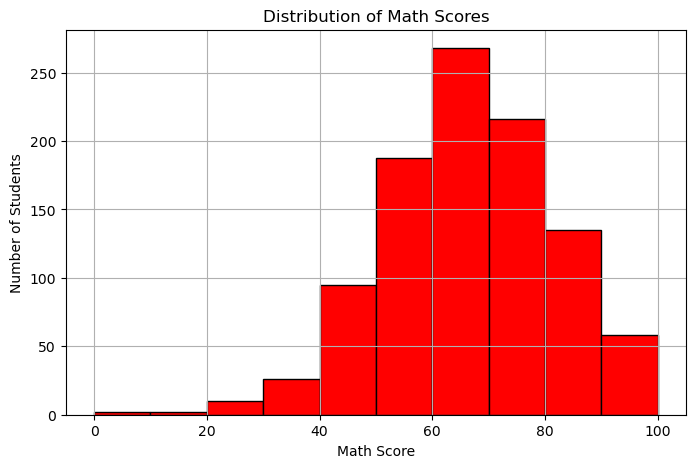

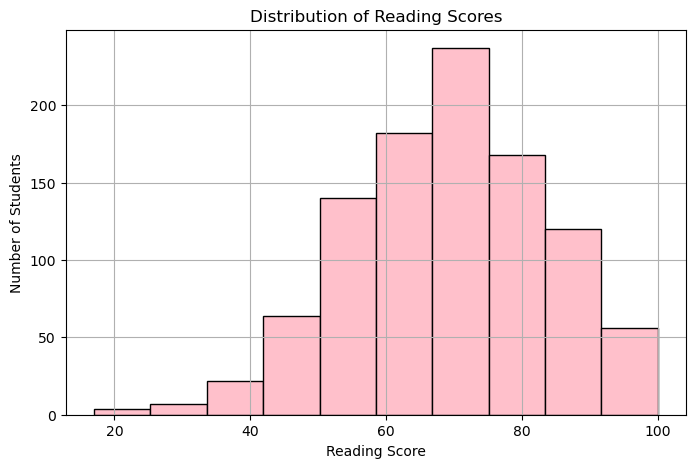

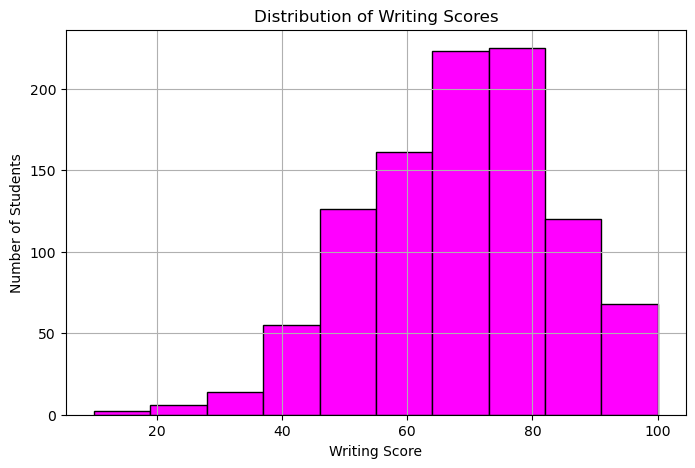

In [51]:
import matplotlib.pyplot as plt

# Plot histogram for math score
plt.figure(figsize=(8, 5))
plt.hist(df['math score'], bins=10, edgecolor='black', color = 'red')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

# Plot histogram for reading score
plt.figure(figsize=(8, 5))
plt.hist(df['reading score'], bins=10, edgecolor='black', color = 'pink')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

# Plot histogram for writing score
plt.figure(figsize=(8, 5))
plt.hist(df['writing score'], bins=10, edgecolor='black', color = 'magenta')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


C:\Program Files\KMSpico\temp\ipykernel_15576\2793786909.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette = 'magma')
C:\Program Files\KMSpico\temp\ipykernel_15576\2793786909.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=df, palette = 'magma')
C:\Program Files\KMSpico\temp\ipykernel_15576\2793786909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=df, palette = 'magma')


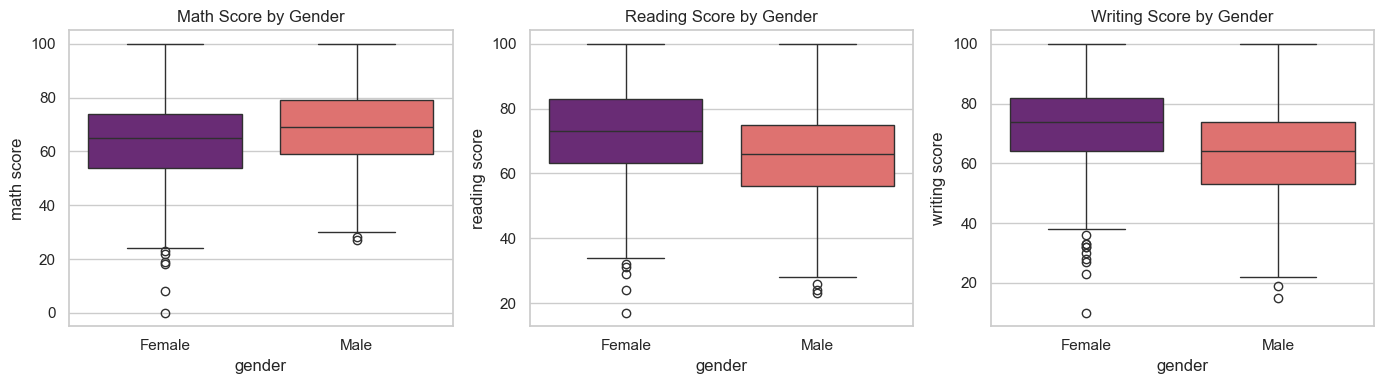

In [57]:
# Set plot style
sns.set(style="whitegrid")

# 1. Box plots by gender
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=df, palette = 'magma')
plt.title('Math Score by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df, palette = 'magma')
plt.title('Reading Score by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df, palette = 'magma')
plt.title('Writing Score by Gender')

plt.tight_layout()
plt.show()

C:\Program Files\KMSpico\temp\ipykernel_15576\2953484931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=df, palette = 'BuGn')
C:\Program Files\KMSpico\temp\ipykernel_15576\2953484931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='reading score', data=df, palette = 'BuGn')
C:\Program Files\KMSpico\temp\ipykernel_15576\2953484931.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='writing score', data=df, pa

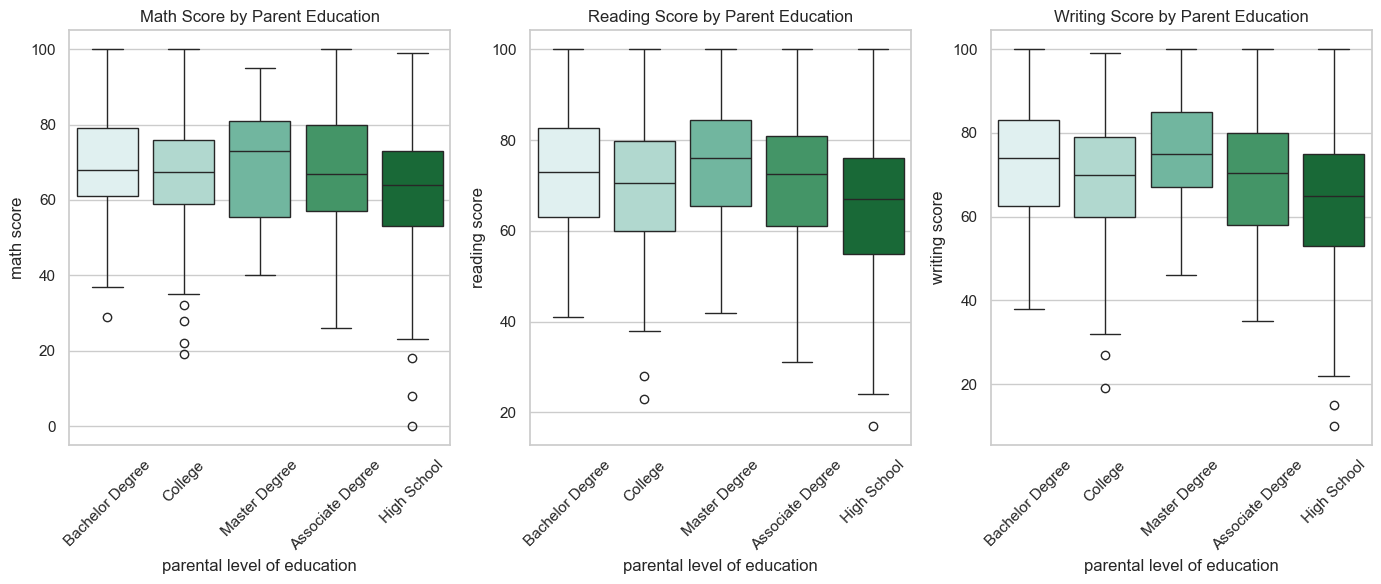

In [61]:
# 2. Box plots by parental level of education
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='parental level of education', y='math score', data=df, palette = 'BuGn')
plt.xticks(rotation=45)
plt.title('Math Score by Parent Education')

plt.subplot(1, 3, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df, palette = 'BuGn')
plt.xticks(rotation=45)
plt.title('Reading Score by Parent Education')

plt.subplot(1, 3, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df, palette = 'BuGn')
plt.xticks(rotation=45)
plt.title('Writing Score by Parent Education')

plt.tight_layout()
plt.show()


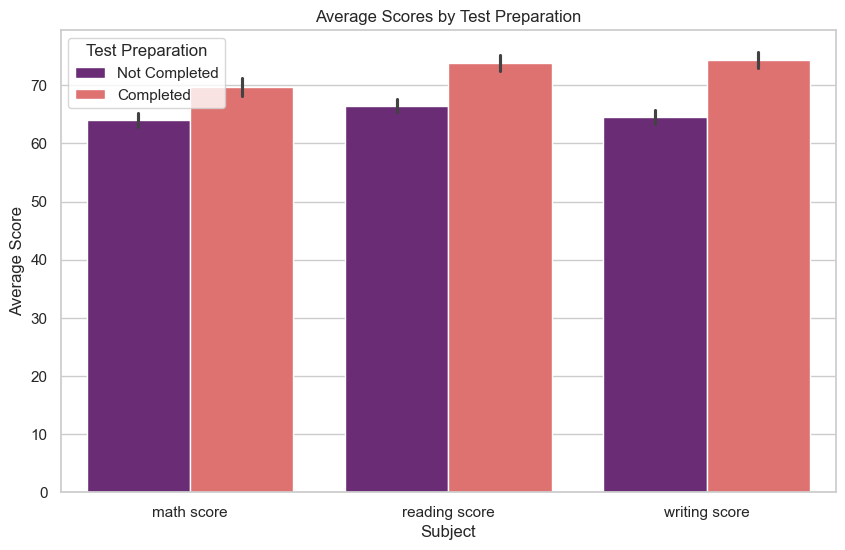

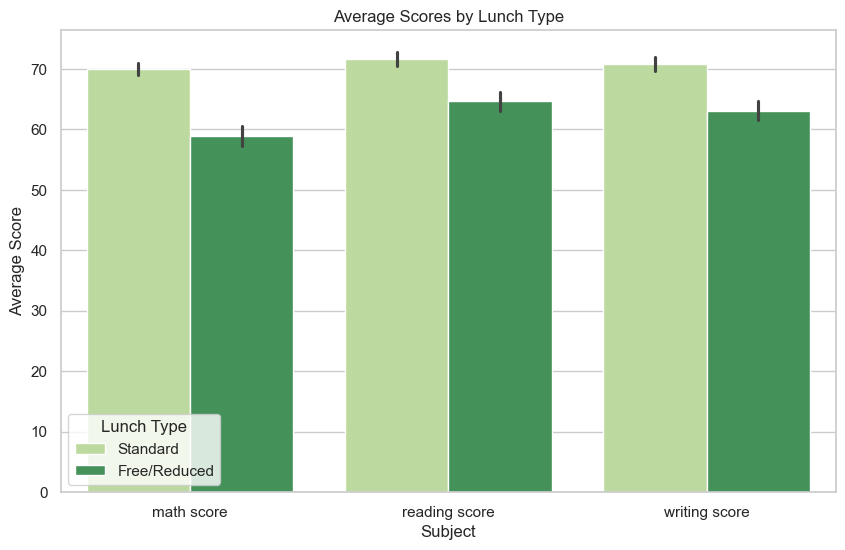

In [69]:
# Melt the data to long format for seaborn
melted_prep = df.melt(id_vars='test preparation course', value_vars=['math score', 'reading score', 'writing score'], 
                      var_name='Subject', value_name='Score')

melted_lunch = df.melt(id_vars='lunch', value_vars=['math score', 'reading score', 'writing score'], 
                       var_name='Subject', value_name='Score')

# Grouped bar plot by Test Preparation
plt.figure(figsize=(10,6))
sns.barplot(data=melted_prep, x='Subject', y='Score', hue='test preparation course', palette = 'magma')
plt.title('Average Scores by Test Preparation')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.legend(title='Test Preparation')
plt.show()

# Grouped bar plot by Lunch Type
plt.figure(figsize=(10,6))
sns.barplot(data=melted_lunch, x='Subject', y='Score', hue='lunch', palette = 'YlGn')
plt.title('Average Scores by Lunch Type')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.legend(title='Lunch Type')
plt.show()


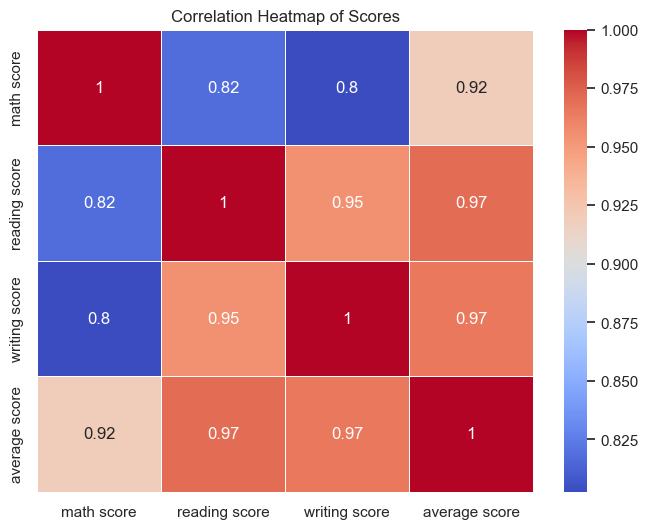

In [71]:
# Select only numeric features
numerical_data = df[['math score', 'reading score', 'writing score', 'average score']]

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Scores')
plt.show()


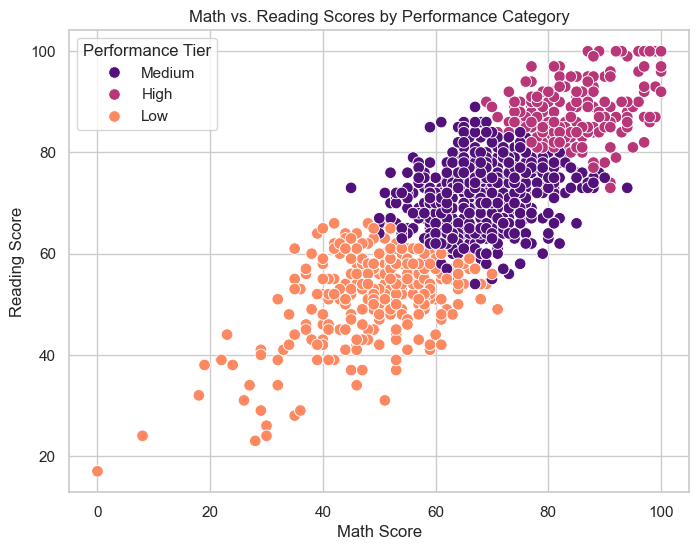

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='performance category', palette='magma', s=70)
plt.title('Math vs. Reading Scores by Performance Category')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Performance Tier')
plt.grid(True)
plt.show()


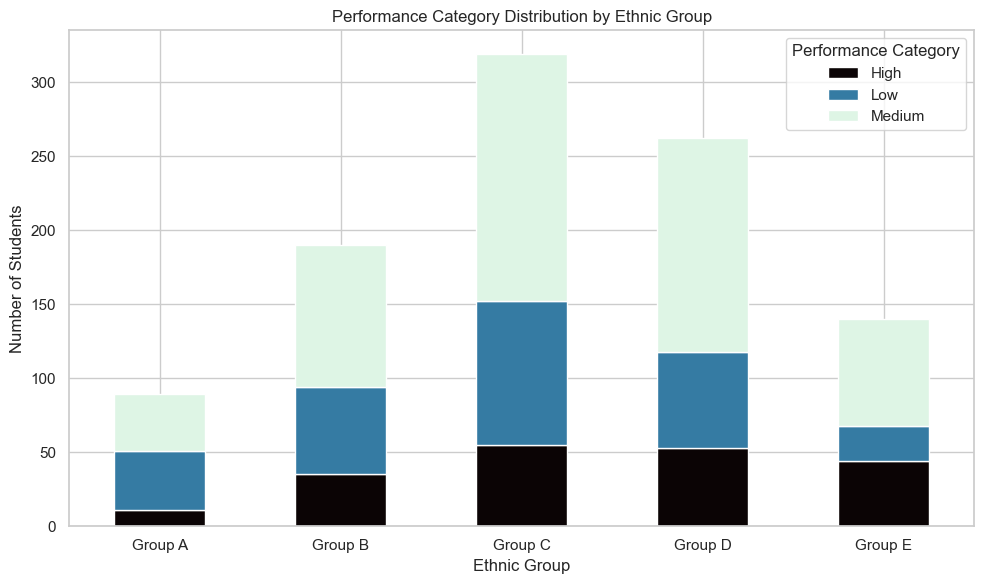

In [79]:
# Count students per group and performance category
group_perf = df.groupby(['race/ethnicity', 'performance category']).size().unstack().fillna(0)

# Plot stacked bar chart
group_perf.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='mako')
plt.title('Performance Category Distribution by Ethnic Group')
plt.xlabel('Ethnic Group')
plt.ylabel('Number of Students')
plt.legend(title='Performance Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


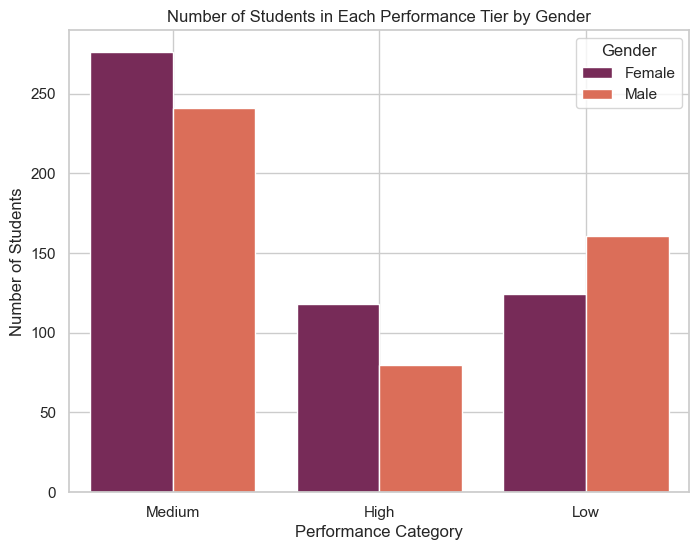

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='performance category', hue='gender', palette='rocket')
plt.title('Number of Students in Each Performance Tier by Gender')
plt.xlabel('Performance Category')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


# Descriptive Stats

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('StudentsPerformance_cleaned.csv')
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average score                  0
performance category           0
preparation effectiveness      0
dtype: int64

In [3]:
#Calculating mean, median, variance, and standard deviation for all three scores

mean_math = np.mean(df['math score'])
mean_read = np.mean(df['reading score'])
mean_write = np.mean(df['writing score'])

median_math = np.median(df['math score'])
median_read = np.median(df['reading score'])
median_write = np.median(df['writing score'])

var_math = np.var(df['math score'])
var_read = np.var(df['reading score'])
var_write = np.var(df['writing score'])

std_math = np.std(df['math score'])
std_read = np.std(df['reading score'])
std_write = np.std(df['writing score'])

print(f"Math Score - Mean: {mean_math}, Median: {median_math}, Variance: {var_math}, Std Dev: {std_math}")
print(f"Reading Score - Mean: {mean_read}, Median: {median_read}, Variance: {var_read}, Std Dev: {std_read}")
print(f"Writing Score - Mean: {mean_write}, Median: {median_write}, Variance: {var_write}, Std Dev: {std_write}") 

Math Score - Mean: 66.089, Median: 66.0, Variance: 229.68907899999996, Std Dev: 15.155496659628149
Reading Score - Mean: 69.169, Median: 70.0, Variance: 212.95243900000003, Std Dev: 14.592890015346516
Writing Score - Mean: 68.054, Median: 69.0, Variance: 230.677084, Std Dev: 15.188057281956768


In [4]:
#Creating  summary  tables  showing  average  scores  per  category  (e.g.,  lunch  type,  test prep)

summary_a = df.groupby(['test preparation course','race/ethnicity',]).agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}).reset_index()
summary_b = df.groupby(['lunch', 'parental level of education',]).agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}).reset_index()
summary_b

,lunch,parental level of education,math score,reading score,writing score
0,Free/Reduced,Associate Degree,62.610390,67.649351,66.025974
1,Free/Reduced,Bachelor Degree,63.000000,68.931818,69.227273
2,Free/Reduced,College,60.126582,65.075949,63.708861
3,Free/Reduced,High School,54.244275,60.167939,57.503817
4,Free/Reduced,Master Degree,61.166667,70.291667,69.875000
5,Standard,Associate Degree,70.682759,72.668966,71.951724
6,Standard,Bachelor Degree,73.189189,75.418919,75.851351
7,Standard,College,70.891156,71.816327,71.598639
8,Standard,High School,67.372951,68.778689,66.893443
9,Standard,Master Degree,75.628571,78.857143,79.657143


In [5]:
summary_a

,test preparation course,race/ethnicity,math score,reading score,writing score
0,Completed,Group A,68.258065,71.032258,70.903226
1,Completed,Group B,67.191176,72.852941,71.882353
2,Completed,Group C,67.495726,73.658120,74.452991
3,Completed,Group D,69.792683,74.146341,76.658537
4,Completed,Group E,77.433333,76.666667,75.983333
5,Not Completed,Group A,58.086207,61.275862,58.275862
6,Not Completed,Group B,61.368852,64.286885,62.098361
7,Not Completed,Group C,62.707921,66.465347,63.990099
8,Not Completed,Group D,66.255556,68.155556,67.177778
9,Not Completed,Group E,71.112500,70.300000,67.975000


In [6]:
summary_c = df.groupby(['lunch']).agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}).reset_index()
summary_d = df.groupby(['test preparation course']).agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}).reset_index()
summary_d

,test preparation course,math score,reading score,writing score
0,Completed,69.695531,73.893855,74.418994
1,Not Completed,64.077882,66.534268,64.504673


In [7]:
#coefficient of variation for math, reading, and writing scores

cv_math = std_math / mean_math
cv_read = std_read / mean_read
cv_write = std_write / mean_write

print(f"Coefficient of Variation for Math Score: {cv_math}")
print(f"Coefficient of Variation for Reading Score: {cv_read}")
print(f"Coefficient of Variation for Writing Score: {cv_write}")
    

Coefficient of Variation for Math Score: 0.2293195033913079
Coefficient of Variation for Reading Score: 0.21097442518102785
Coefficient of Variation for Writing Score: 0.22317655511735926


In [8]:
# top 3 factors associated with high performance (based on group averages)

top_factors = df.groupby(['parental level of education', 'lunch', 'test preparation course']).agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}).reset_index()
top_factors['average_score'] = (top_factors['math score'] + top_factors['reading score'] + top_factors['writing score']) / 3

top_factors.sort_values(by='average_score', ascending=False).head(3)


,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
18,Master Degree,Standard,Completed,78.000000,84.375000,85.500000,82.625000
10,College,Standard,Completed,76.921569,79.568627,80.156863,78.882353
6,Bachelor Degree,Standard,Completed,77.103448,78.448276,80.448276,78.666667


In [9]:
#feature (e.g., lunch type, gender) has the largest score variance

var_gender = df.groupby('gender')['average score'].var().mean()
var_race = df.groupby('race/ethnicity')['average score'].var().mean()
var_parent_edu = df.groupby('parental level of education')['average score'].var().mean()
var_lunch = df.groupby('lunch')['average score'].var().mean()
var_test_prep = df.groupby('test preparation course')['average score'].var().mean()

print("Gender Variance:", var_gender)
print("Race/Ethnicity Variance:", var_race)
print("Parental Education Variance:", var_parent_edu)
print("Lunch Variance:", var_lunch)
print("Test Preparation Variance:", var_test_prep)


Gender Variance: 199.56121540274444
Race/Ethnicity Variance: 201.17922658218671
Parental Education Variance: 191.48455413416144
Lunch Variance: 191.46351940891992
Test Preparation Variance: 185.61249224093865


# Machine Learning 

In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, RandomTreesEmbedding
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder


df = pd.read_csv('StudentsPerformance_cleaned.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,performance category,preparation effectiveness
0,Female,Group B,Bachelor Degree,Standard,Not Completed,72,72,74,72.666667,Medium,Not Effective
1,Female,Group C,College,Standard,Completed,69,90,88,82.333333,High,Effective
2,Female,Group B,Master Degree,Standard,Not Completed,90,95,93,92.666667,High,Not Effective
3,Male,Group A,Associate Degree,Free/Reduced,Not Completed,47,57,44,49.333333,Low,Not Effective
4,Male,Group C,College,Standard,Not Completed,76,78,75,76.333333,Medium,Not Effective
...,...,...,...,...,...,...,...,...,...,...,...
995,Female,Group E,Master Degree,Standard,Completed,88,99,95,94.000000,High,Effective
996,Male,Group C,High School,Free/Reduced,Not Completed,62,55,55,57.333333,Low,Not Effective
997,Female,Group C,High School,Free/Reduced,Completed,59,71,65,65.000000,Medium,Effective
998,Female,Group D,College,Standard,Completed,68,78,77,74.333333,Medium,Effective


-------------------------------------------------------------------------REGRESSION-------------------------------------------------------------------------------------------------------

### LINEAR REGRESSION

-----------FEATURE, TARGET COLUMN 
                                ----------->ENCODING, PIPELINES

In [96]:
'''
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['lunch'] = df['lunch'].map({'Standard': 1, 'Free/Reduced': 0})

level_edu = {'High School': 0, 'Associate Degree': 1, 'College': 2,  'Bachelor Degree': 3, 'Master Degree': 4}

df['parental level of education'] = df['parental level of education'].map(level_edu)

r_e_map = {'Group A': 0, 'Group B': 1, 'Group C': 2, 'Group D': 3, 'Group E': 4}
df['race/ethnicity'] = df['race/ethnicity'].map(r_e_map)

df['test preparation course'] = df['test preparation course'].map({'Completed': 1, 'Not Completed': 0})

feature_linear = df[['parental level of education','test preparation course', 'lunch', 'gender', 'race/ethnicity']]
target_linear = df['average score']
'''

feature_linear = df[['parental level of education','test preparation course', 'lunch', 'gender', 'race/ethnicity']]
target_linear = df['average score']

categorical_cols = ['gender', 'race/ethnicity', 
                    'parental level of education', 
                    'lunch', 'test preparation course']
numerical_cols = []

# Transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

### CHECKING FOR NULL VALUES IN FEATURE BEFORE TRAINING, TESTING AND EVALUATION

In [100]:
feature_linear.isnull().sum()

parental level of education    0
test preparation course        0
lunch                          0
gender                         0
race/ethnicity                 0
dtype: int64

### LINEAR REGRESSION TRAINING, TESTING AND EVALUATION

In [103]:
X_train, X_test, y_train, y_test = train_test_split(feature_linear, target_linear, test_size=0.4, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))

MAE: 10.3815625
RMSE: 13.085142357683136
R²: 0.2181829695584644


## RANDOM FOREST REGRESSION

#### MANUAL DATA ENCODING

In [107]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['lunch'] = df['lunch'].map({'Standard': 1, 'Free/Reduced': 0})

level_edu = {'High School': 0, 'Associate Degree': 1, 'College': 2,  'Bachelor Degree': 3, 'Master Degree': 4}

df['parental level of education'] = df['parental level of education'].map(level_edu)

r_e_map = {'Group A': 0, 'Group B': 1, 'Group C': 2, 'Group D': 3, 'Group E': 4}
df['race/ethnicity'] = df['race/ethnicity'].map(r_e_map)

df['test preparation course'] = df['test preparation course'].map({'Completed': 1, 'Not Completed': 0})


FEATURE, TARGET SELECTION
TRAINING AND TESTING DATA SPLITTING

In [110]:
feature_RF = df[['parental level of education','test preparation course', 'lunch']]
target_RF = df['average score']

X_train, X_test, y_train, y_test = train_test_split(feature_RF, target_RF, test_size=0.5, random_state=42)

TRAINING AND EVALUATING

In [113]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))

MAE: 10.421238056773957
RMSE: 13.157937122848454
R²: 0.19362240460595181


The R² values obtained from both Linear Regression (≈0.23) and Random Forest (≈0.19) are relatively low, which indicates that the chosen demographic features—gender, race/ethnicity, parental level of education, lunch type, and test preparation course—explain only a small portion of the variance in students’ average scores. 


This outcome suggests that while these factors may have some influence, student performance is largely driven by other variables not present in the dataset, such as study habits, teaching quality, motivation, or socio-economic background. 


The key insight here is that demographic information alone is insufficient for accurately predicting academic performance. This reinforces the importance of incorporating richer academic and behavioral data in future analyses to build more reliable predictive models.

The correlation heatmap suggests the same, where the highest correlation of average score (our target value) is with test prep. course, which is 0.26, and all further values are
lower than that.

This tells us that the data are not strongly affecting the average score as a whole, and more factors such as study hours, socio economic background, and habits, etc.
influence the score more

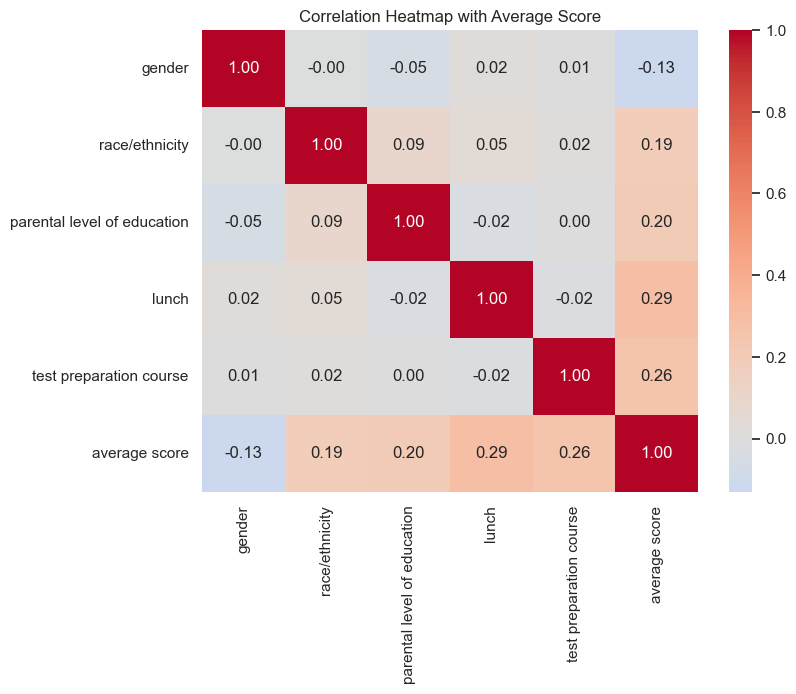

In [117]:
corr = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'average score']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap with Average Score")
plt.show()

### ---------------------------------------------------------CLASSIFICATION----------------------------------------------------

In [135]:
X = df[[ 'parental level of education', 'lunch', 'test preparation course', 'gender']]
y = df['performance category']


categorical_cols = ['parental level of education', 
                    'lunch', 'test preparation course']
numerical_cols = []

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [137]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.5375


In [139]:
dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Accuracy: 0.535


In [141]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.53


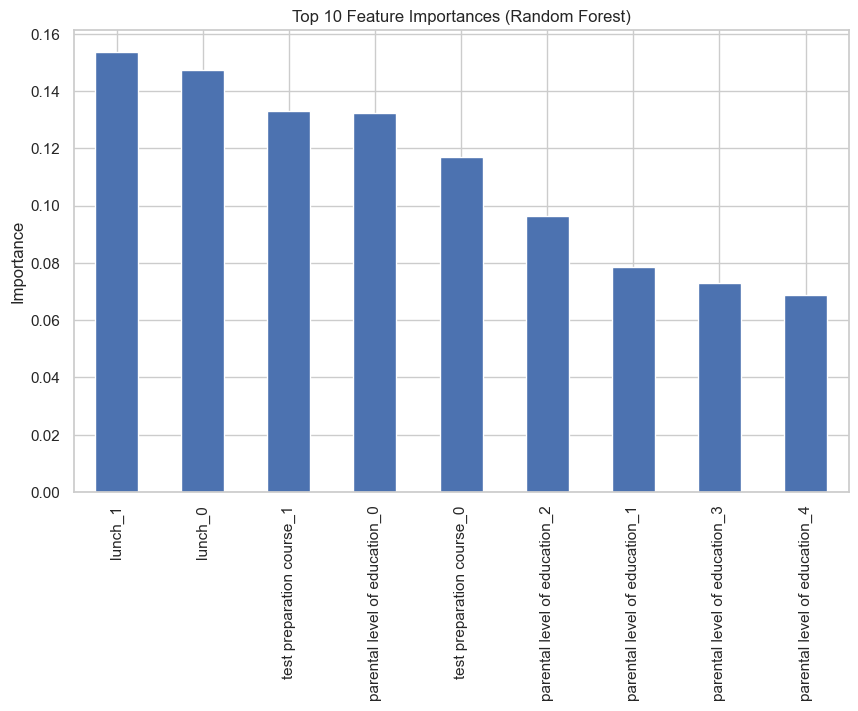

In [142]:
encoder = rf.named_steps['preprocessor'].named_transformers_['cat']
feature_names = encoder.get_feature_names_out(categorical_cols)

importances = rf.named_steps['classifier'].feature_importances_

feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()

## Tableau Dashboard

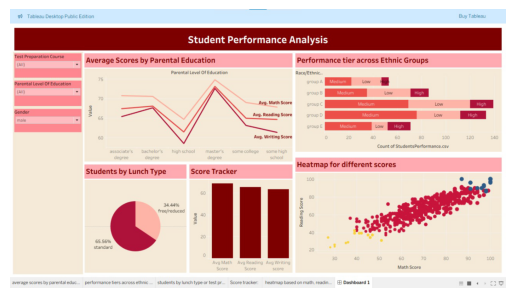

In [7]:
import shutil
import os
from PIL import Image
import matplotlib.pyplot as plt

source = r"C:\Users\RISHIKA\rishika code\Downloads\WhatsApp Image 2025-08-02 at 6.16.13 PM.jpeg"
destination = os.path.join('.', os.path.basename(source))
shutil.copy(source, destination)

# Open and display the image
img = Image.open(destination)
plt.imshow(img)
plt.axis('off')
plt.show()
